In [6]:
#
# general interplanetary trajectories
#

import sympy
from sympy import *
import sys

#
# symbols
#

μ_Sun        = Symbol( 'μ_Sun' )   # Sun geocentric graviational constant, km^3/s^2
μ_1          = Symbol( 'μ_1' )     # planet #1 geocentric graviational constant, km^3/s^2
μ_2          = Symbol( 'μ_2' )     # planet #2 geocentric graviational constant, km^3/s^2
R_1          = Symbol( 'R_1' )     # heliocentric radius of planet #1, km        
R_2          = Symbol( 'R_2' )     # heliocentric radius of planet #2, km
r_1          = Symbol( 'r_1' )     # planet #1 radius, km
r_2          = Symbol( 'r_2' )     # planet #2 radius, km
h_1e         = Symbol( 'h_1e' )    # planet #1 circular parking orbit altitude, km
h_2e         = Symbol( 'h_2e' )    # planet #2 circular parking orbit altitude, km
r_1e         = Symbol( 'r_1e' )    # planet #1 circular parking orbit radius, km
r_2e         = Symbol( 'r_2e' )    # planet #2 circular parking orbit radius, km

#
# values for a Earth ( planet #1 ) to Mars ( planet #2 ) mission
#

values = [
            ( r_1e  , h_1e + r_1 ) ,
            ( r_2e  , h_2e + r_2 ) ,
            ( μ_Sun , 1.327 * 10**11 ) ,
            ( μ_1   , 3.986 * 10**5 ) ,
            ( μ_2   , 4.2828 * 10**4 ) ,
            ( R_1   , 149.6 * 10**6 ) ,
            ( R_2   , 227.9 * 10**6 ) ,    
            ( r_1   , 6378 ) ,
            ( r_2   , 3396 ) ,
            ( h_1e  , 300 ) ,
            ( h_2e  , 300 ) ,
]

#
# heliocentric velocity of planet #1, km/s
#

V_1 = sqrt( μ_Sun / R_1 )

print( 'V_1 = ' , V_1.subs( values ).evalf() , 'km/s' )
print()

#
# heliocentric velocity of planet #2, km/s
#

V_2 = sqrt( μ_Sun / R_2 )

print( 'V_2 = ' , V_2.subs( values ).evalf() , 'km/s' )
print()

#
# ------------------------------------------------------
# Hohmann transfer orbit between planet #1 and planet #2
# ------------------------------------------------------
#

#
# semimajor axis of Hohmann transfer orbit between planet #1 and planet #2, km
#

a_H = ( R_1 + R_2 ) / 2

#
# energy constant for Hohmann transfer orbit between planet #1 and planet #2, km^2/s^2
#

ϵ_H = - μ_Sun / ( 2 * a_H )

#
# Hohmann transfer orbit velocity at planet #1, km/s ( V_H_1**2 / 2 - μ_Sun / R_H_1 = ϵ_H )
#

R_H_1 = R_1

V_H_1 = sqrt( 2 * μ_Sun / R_H_1 + 2 * ϵ_H )

print( 'V_H_1 = ' , V_H_1.subs( values ).evalf() , 'km/s' )
print()

#
# Hohmann transfer orbit velocity at planet #2, km/s ( V_H_2**2 / 2 - μ_Sun / R_H_2 = ϵ_H )
#

R_H_2 = R_2

V_H_2 = sqrt( 2 * μ_Sun / R_H_2 + 2 * ϵ_H )

print( 'V_H_2 = ' , V_H_2.subs( values ).evalf() , 'km/s' )
print()

#
# Hohmann transfer orbit specific angular momentum, km^2/s ( h_H = V_H_1 * R_H_1 = V_H_2 * R_H_2 )
#

h_H = V_H_1 * R_H_1

#
# Hohmann transfer orbit eccentricity ( a_H = h_H**2 / μ_Sun / ( 1 - e_H**2 ) )
#

e_H = sqrt( 1 - h_H**2 / ( μ_Sun * a_H ) )

print( 'e_H = ' , e_H.subs( values ).evalf() )
print()

#
# -------------------
# planet #1 departure
# -------------------
#

#
# planet #1 hyperbolic departure orbit relative frame velocity, km/s
#

v_inf_plus_1 = V_H_1 - V_1

print( 'v_inf_plus_1 = ' , v_inf_plus_1.subs( values ).evalf() , 'km/s' )
print()

#
# planet #1 hyperbolic departure orbit energy, km^2/s^2
#

ϵ_1h = v_inf_plus_1**2 / 2

#
# planet #1 hyperbolic departure orbit semimajor axis, km ( ϵ_1h = - μ_1 / ( 2 * a_1h ) )
#

a_1h = - μ_1 / ( 2 * ϵ_1h )

#
# periapse radius of planet #1 hyperbolic departure orbit, km ( r_p_1h = r_p_1e = r_1e )
#

r_p_1e = r_1e

r_p_1h = r_p_1e

#
# periapse velocity of planet #1 hyperbolic departure orbit, km/s ( v_p_1h**2 / 2 - μ_1 / r_p_1h = ϵ_1h )
#

v_p_1h = sqrt( 2 * μ_1 / r_p_1h + 2 * ϵ_1h )

#
# planet #1 hyperbolic departure orbit specific angular momentum, km^2/s ( h_1h = v_p_1h * r_p_1h )
#

h_1h = v_p_1h * r_p_1h

#
# planet #1 hyperbolic departure orbit eccentricity ( a_1h = h_1h**2 / μ_1 / ( 1 - e_1h**2 ) )
#

e_1h = sqrt( 1 - h_1h**2 / ( μ_1 * a_1h ) )

print( 'e_1h = ' , e_1h.subs( values ).evalf() )
print()

#
# planet #1 parking orbit velocity, km/s ( v_1e = sqrt( μ_1 / r_1e )
#

v_1e = sqrt( μ_1 / r_1e )

#
# planet #1 departure Δv_1, km/s
#

Δv_1 = v_p_1h - v_1e

print( 'Δv_1 = ' , Δv_1.subs( values ).evalf() , 'km/s' )
print()

#
# planet #1 departure angle β_1h = acos( 1 / e_1h )
#

β_1h = acos( 1 / e_1h )

print( 'β_1h = '   , ( β_1h * 180 / pi ).subs( values ).evalf() , 'degrees' )
print()

#
# planet #1 departure offset distance /aiming radius, km ( d_1h = - a_1h * sqrt( e_1h**2 - 1 ) = h_1h / v_inf_plus_1 )
#

d_1h = h_1h / v_inf_plus_1

print( 'd_1h = '   , d_1h.subs( values ).evalf() , 'km' )
print()



# Now we want to tweak this for the arrival at planet #2
#
# -------------------
# planet #2 arrival
# -------------------
#

#
# planet #2 hyperbolic arrival orbit relative frame velocity, km/s
#

v_inf_minus_2 = V_H_2 - V_2

print( 'v_inf_minus_2 = ' , v_inf_minus_2.subs( values ).evalf() , 'km/s' )
print()

#
# planet #2 hyperbolic arrival orbit energy, km^2/s^2
#

ϵ_2h = v_inf_minus_2**2 / 2

#
# planet #2 hyperbolic arrival orbit semimajor axis, km ( ϵ_1h = - μ_1 / ( 2 * a_1h ) )
#

a_2h = - μ_2 / ( 2 * ϵ_2h )

#
# periapse radius of planet #2 hyperbolic arrival orbit, km ( r_p_1h = r_p_1e = r_1e )
#

r_p_2e = r_2e

r_p_2h = r_p_2e

#
# periapse velocity of planet #2 hyperbolic arrival orbit, km/s ( v_p_1h**2 / 2 - μ_1 / r_p_1h = ϵ_1h )
#

v_p_2h = sqrt( 2 * μ_2 / r_p_2h + 2 * ϵ_2h )

#
# planet #2 hyperbolic arrival orbit specific angular momentum, km^2/s ( h_1h = v_p_1h * r_p_1h )
#

h_2h = v_p_2h * r_p_2h

#
# planet #2 hyperbolic arrival orbit eccentricity ( a_1h = h_1h**2 / μ_1 / ( 1 - e_1h**2 ) )
#

e_2h = sqrt( 1 - h_2h**2 / ( μ_2 * a_2h ) )

print( 'e_2h = ' , e_2h.subs( values ).evalf() )
print()

#
# planet #2 parking orbit velocity, km/s ( v_1e = sqrt( μ_1 / r_1e )
#

v_2e = sqrt( μ_2 / r_2e )

#
# planet #2 arrival Δv_1, km/s
#

Δv_2 = v_p_2h - v_2e

print( 'Δv_2 = ' , Δv_2.subs( values ).evalf() , 'km/s' )
print()

#
# planet #2 arrival angle β_1h = acos( 1 / e_1h )
#

β_2h = acos( 1 / e_2h )

print( 'β_2h = '   , ( β_2h * 180 / pi ).subs( values ).evalf() , 'degrees' )
print()

#
# planet #2 arrival offset distance /aiming radius, km ( d_1h = - a_1h * sqrt( e_1h**2 - 1 ) = h_1h / v_inf_plus_1 )
#

d_2h = h_2h / v_inf_minus_2

print( 'd_2h = '   , d_2h.subs( values ).evalf() , 'km' )
print()




V_1 =  29.7830838826589 km/s

V_2 =  24.1303320889342 km/s

V_H_1 =  32.7264085030286 km/s

V_H_2 =  21.4825393244979 km/s

e_H =  0.207417218543047

v_inf_plus_1 =  2.94332462036965 km/s

e_1h =  1.14513944125388

Δv_1 =  3.58965059937265 km/s

β_1h =  29.1607475029151 degrees

d_1h =  25673.2857901427 km

v_inf_minus_2 =  -2.64779276443627 km/s

e_2h =  1.60502337047003

Δv_2 =  2.09012511718791 km/s

β_2h =  51.4612424255422 degrees

d_2h =  -7669.22888230263 km



In [7]:

#
# -------------------
# planet #2 flyby
# -------------------
#

#
# planet #2 hyperbolic flyby orbit relative frame velocity, km/s
#

v_inf_minus_2 = V_H_2 - V_2

print( 'v_inf_minus_2 = ' , v_inf_minus_2.subs( values ).evalf() , 'km/s' )
print()

#
# planet #2 hyperbolic flyby orbit energy, km^2/s^2
#

ϵ_2h = v_inf_minus_2**2 / 2

#
# planet #2 hyperbolic flyby orbit semimajor axis, km ( ϵ_1h = - μ_1 / ( 2 * a_1h ) )
#

a_2h = - μ_2 / ( 2 * ϵ_2h )

#
# periapse radius of planet #2 hyperbolic flyby orbit, km ( r_p_1h = r_p_1e = r_1e )
#

r_p_2e = r_2e

r_p_2h = r_p_2e

#
# periapse velocity of planet #2 hyperbolic flyby orbit, km/s ( v_p_1h**2 / 2 - μ_1 / r_p_1h = ϵ_1h )
#

v_p_2h = sqrt( 2 * μ_2 / r_p_2h + 2 * ϵ_2h )

#
# planet #2 hyperbolic flyby orbit specific angular momentum, km^2/s ( h_1h = v_p_1h * r_p_1h )
#

h_2h = v_p_2h * r_p_2h

#
# planet #2 hyperbolic flyby orbit eccentricity ( a_1h = h_1h**2 / μ_1 / ( 1 - e_1h**2 ) )
#

e_2h = sqrt( 1 - h_2h**2 / ( μ_2 * a_2h ) )

print( 'e_2h = ' , e_2h.subs( values ).evalf() )
print()


# now we want to calculate the turn angle

# planet #2 hyperbolic flyby orbit turn angle delta_2h

δ_2h = 2 * asin( 1 / e_2h)

print( 'δ_2h = ' , δ_2h.subs( values ).evalf() )
print()

# heliocentric velocity after the flyby

V_2_x = abs(V_2) * cos(-pi/2)
V_2_y = abs(V_2) * sin(-pi/2)
V_2_z = abs(V_2) * 0

V_H_2_x = abs(V_H_2) * cos(-pi/2)
V_H_2_y = abs(V_H_2) * sin(-pi/2)
V_H_2_z = abs(V_H_2) * 0

v_inf_plus_2 = v_inf_minus_2

v_inf_plus_2_x_sunlit_side = abs(v_inf_plus_2) * cos( pi/2 + δ_2h)
v_inf_plus_2_y_sunlit_side = abs(v_inf_plus_2) * sin( pi/2 + δ_2h)
v_inf_plus_2_z_sunlit_side = abs(v_inf_plus_2) * 0

v_inf_plus_2_x_dark_side = abs(v_inf_plus_2) * cos( pi/2 - δ_2h)
v_inf_plus_2_y_dark_side = abs(v_inf_plus_2) * sin( pi/2 - δ_2h)
v_inf_plus_2_z_dark_side = abs(v_inf_plus_2) * 0

V_H_2_x_plus_light_side = V_2_x + v_inf_plus_2_x_sunlit_side
V_H_2_y_plus_light_side = V_2_y + v_inf_plus_2_y_sunlit_side
V_H_2_z_plus_light_side = V_2_z + v_inf_plus_2_z_sunlit_side

V_H_2_plus_sunlit_side = sqrt(V_H_2_x_plus_light_side**2 + V_H_2_y_plus_light_side**2 + V_H_2_z_plus_light_side**2)

# lets compare it with Mars not being there

ΔV_H_2_sunlit = V_H_2_plus_sunlit_side - V_H_2

print( 'V_H_2_plus_sunlit_side = ' , V_H_2_plus_sunlit_side.subs( values ).evalf() , 'km/s' )
print( 'V_H_2 = ' , V_H_2.subs( values ).evalf() , 'km/s' )
print( 'ΔV_H_2_sunlit = ' , ΔV_H_2_sunlit.subs( values ).evalf() , 'km/s' )
print()

V_H_2_x_plus_dark_side = V_2_x + v_inf_plus_2_x_dark_side
V_H_2_y_plus_dark_side = V_2_y + v_inf_plus_2_y_dark_side
V_H_2_z_plus_dark_side = V_2_z + v_inf_plus_2_z_dark_side

V_H_2_plus_dark_side = sqrt(V_H_2_x_plus_dark_side**2 + V_H_2_y_plus_dark_side**2 + V_H_2_z_plus_dark_side**2)

# lets compare it with Mars not being there

ΔV_H_2_dark = V_H_2_plus_dark_side - V_H_2

print( 'V_H_2_plus_dark_side = ' , V_H_2_plus_dark_side.subs( values ).evalf() , 'km/s' )
print( 'V_H_2 = ' , V_H_2.subs( values ).evalf() , 'km/s' )
print( 'ΔV_H_2_dark = ' , ΔV_H_2_dark.subs( values ).evalf() , 'km/s' )
print()

# new heliocentric orbit properties for dark and sunlit flybys (sunlit side pass case)

ε_H_new = V_H_2_plus_sunlit_side**2 / 2 - μ_Sun / R_2

# new heliocentric orbital elements

a_H_new = -μ_Sun / (2*ε_H_new)

# new angular momentum

h_H_new = V_H_2_plus_sunlit_side * R_2

# new eccentricity

e_H_new = sqrt( 1 - h_H_new**2 / ( μ_Sun * a_H_new ) )


# lets compare with previous values

print( 'e_H = ' , e_H.subs( values ).evalf() )
print( 'e_H_new = ' , e_H_new.subs( values ).evalf() )
print()

print( 'a_H = ' , a_H.subs( values ).evalf() )
print( 'a_H_new = ' , a_H_new.subs( values ).evalf() )
print()



# previous vs current apses:
# radius at apses:

print( 'current apse radius:         ' , (R_2/10**6).subs( values ).evalf() ,' 10^6 km')
print()
print( 'opposite apse radius before: ' , ((2*a_H - R_2)/10**6).subs( values ).evalf() ,' 10^6 km')
print( 'opposite apse radius now:    ' , ((2*a_H_new - R_2)/10**6).subs( values ).evalf() ,' 10^6 km')


v_inf_minus_2 =  -2.64779276443627 km/s

e_2h =  1.60502337047003

δ_2h =  1.34525641860438

V_H_2_plus_sunlit_side =  23.6792526972181 km/s
V_H_2 =  21.4825393244979 km/s
ΔV_H_2_sunlit =  2.19671337272020 km/s

V_H_2_plus_dark_side =  23.6792526972181 km/s
V_H_2 =  21.4825393244979 km/s
ΔV_H_2_dark =  2.19671337272020 km/s

e_H =  0.207417218543047
e_H_new =  0.0370374740672430

a_H =  188750000.000000
a_H_new =  219760621.673756

current apse radius:          227.900000000000  10^6 km

opposite apse radius before:  149.600000000000  10^6 km
opposite apse radius now:     211.621243347512  10^6 km


-μ_2/((h_capture + r_2)**2*sqrt(2*μ_2/(h_capture + r_2) + (-sqrt(μ_Sun/R_2) + sqrt(-2*μ_Sun/(R_1 + R_2) + 2*μ_Sun/R_2))**2)) + sqrt(μ_2*( e_capture + 1)/(h_capture + r_2))/(2*(h_capture + r_2))


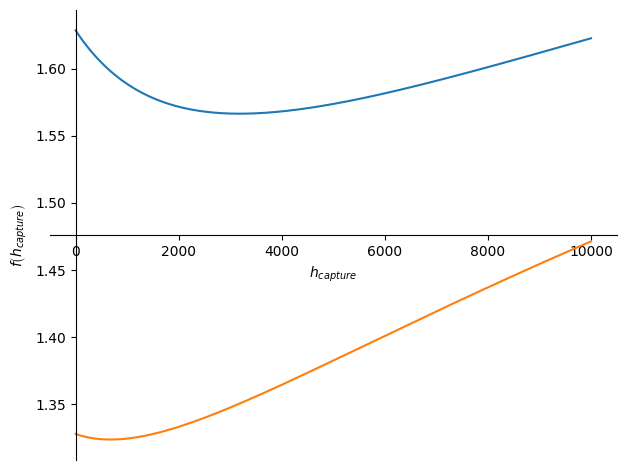

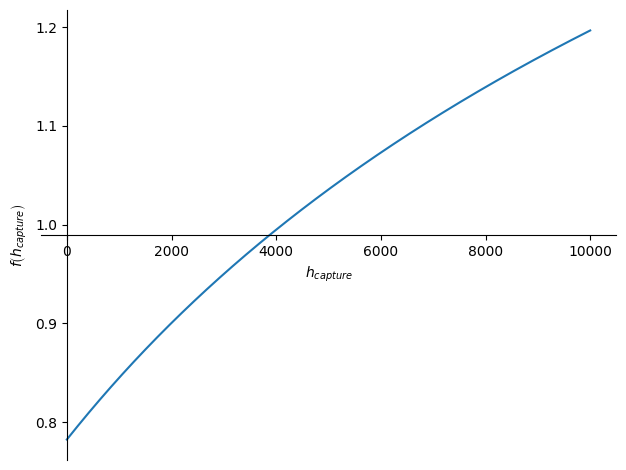

In [8]:
# optimal periapse radius for specific eccentricity

h_capture = Symbol( 'h_capture')
e_capture = Symbol( ' e_capture')

Δv_capture  = sqrt(2*ε_2h + 2 * μ_2 / (h_capture + r_2)) - sqrt(μ_2 * (1 + e_capture) / (h_capture + r_2))

dvdh = diff(Δv_capture,h_capture)

print(dvdh)

# h_capture_optimum = solve(dvdh.subs(values).subs(e_capture,0.3).evalf(),h_capture)

# print( 'h_capture_optimum at 0.3' ,h_capture_optimum)

# h_capture_optimum = solve(dvdh.subs(values).subs(e_capture,0.5).evalf(),h_capture)

# print( 'h_capture_optimum at 0.5' ,h_capture_optimum)

# h_capture_optimum = solve(dvdh.subs(values).subs(e_capture,0.9).evalf(),h_capture)

# print( 'h_capture_optimum at 0.9' ,h_capture_optimum)

plot(Δv_capture.subs(values).subs(e_capture, "0.3").evalf(),Δv_capture.subs(values).subs(e_capture, "0.5").evalf(),(h_capture, 0, 10000) )

plot(Δv_capture.subs(values).subs(e_capture, "0.9").evalf(),(h_capture, 0, 10000) )


v_p_2h =  5.49419067731779 km/s
Δv_Oberth imparted at periapsis =  1.00000000000000 km/s
v_inf_plus_2 =  2.64779276443627 km/s
v_inf_plus_2_Oberth =  4.35880578576709 km/s


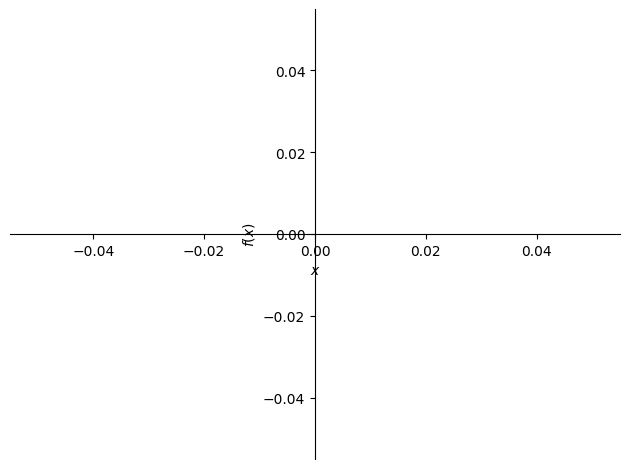

Δv increase at escape :  1.71101302133082 km/s
effective Δv multiplier :  1.71101302133082 km/s


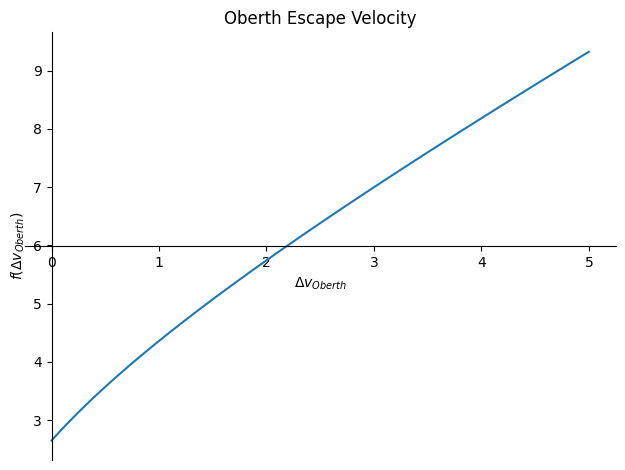

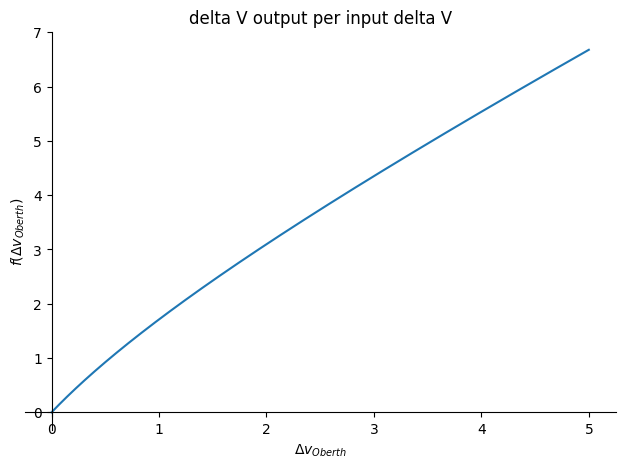

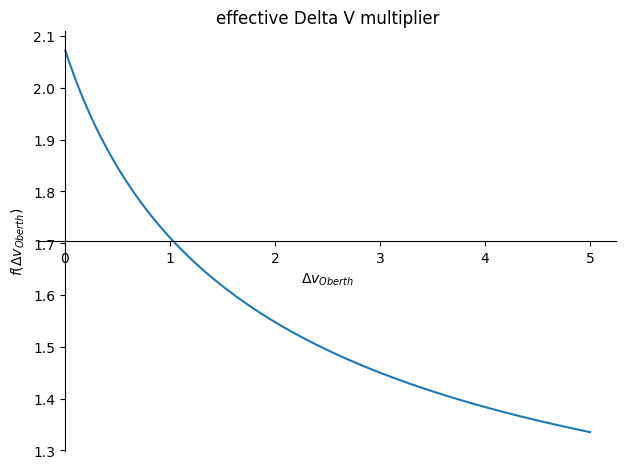

In [ ]:
# Oberth Effect; Powered flyby effect

Δv_Oberth = Symbol('Δv_Oberth')

v_p_2h_Oberth = v_p_2h + Δv_Oberth

new_values = values
new_values.append(((Δv_Oberth, 1)))

print('v_p_2h = ', v_p_2h.subs(new_values).evalf(), 'km/s')

print('Δv_Oberth imparted at periapsis = ', Δv_Oberth.subs(new_values).evalf(), 'km/s')

# Let us see how this affected the hyperbolic orbit

r_p_2h_Oberth = r_p_2h # it remains unchanged

ε_2h_Oberth = v_p_2h_Oberth**2 / 2 -  μ_2/r_p_2h_Oberth

# now to calculate v_inf; excess hyperbolic energy

v_inf_plus_2_Oberth = sqrt ( 2 * ε_2h_Oberth)

v_inf_plus_2 = abs(v_inf_minus_2)

print('v_inf_plus_2 = ', v_inf_plus_2.subs(new_values).evalf(), 'km/s')
print('v_inf_plus_2_Oberth = ', v_inf_plus_2_Oberth.subs(new_values).evalf(), 'km/s')

Δv_escape_increase = (v_inf_plus_2_Oberth - v_inf_plus_2)
plot()
print('Δv increase at escape : ',Δv_escape_increase.subs(new_values).evalf(), 'km/s')

Δv_multiplier = Δv_escape_increase/Δv_Oberth

print('effective Δv multiplier : ',Δv_multiplier.subs(new_values).evalf(), 'km/s')
values.pop()

plot(v_inf_plus_2_Oberth.subs(values).evalf(),(Δv_Oberth,0,5),title="Oberth Escape Velocity")

plot(Δv_escape_increase.subs(values).evalf(),(Δv_Oberth,0,5),title="delta V output per input delta V")


plot(Δv_multiplier.subs(values).evalf(),(Δv_Oberth,0,5),title="effective Delta V multiplier")


# I wonder how this will be affected by the mass of the planetary body?
# I suspect this effect will be magnified for a body like Jupiter compared with Mars